In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date

today = date.today()

date1 = today.strftime("%m/%d/%Y")


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_current_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"

    payload = {
        "appid": api_key,
        "q": city}
    r = requests.get(url,params=payload)
    if r.status_code == 200:
        return r.json()
        
    else:
        return None

In [4]:
print("Beginning Data Retrieval\n---------------------------\n")

Beginning Data Retrieval
---------------------------



In [5]:
response_data = []

for city in cities:
    response = get_current_weather(city,api_key)
    try:
        print("Processing Record ... |" + response['name'])
        response_data.append(response)
    except:
        print("City not found. Skipping...")


Processing Record ... |Port Elizabeth
Processing Record ... |Ola
Processing Record ... |Cape Town
City not found. Skipping...
Processing Record ... |Busselton
Processing Record ... |Nome
Processing Record ... |Serov
Processing Record ... |Vaini
Processing Record ... |Albany
Processing Record ... |Tasiilaq
Processing Record ... |Norman Wells
City not found. Skipping...
Processing Record ... |Lavrentiya
City not found. Skipping...
Processing Record ... |Hirara
Processing Record ... |Bluff
City not found. Skipping...
Processing Record ... |Thompson
Processing Record ... |Port Alfred
Processing Record ... |Avarua
Processing Record ... |Saint-Philippe
City not found. Skipping...
City not found. Skipping...
Processing Record ... |Broome
Processing Record ... |Nikolskoye
Processing Record ... |Kapaa
Processing Record ... |Punta Arenas
Processing Record ... |Hobart
Processing Record ... |Souillac
Processing Record ... |Skjervoy
Processing Record ... |Cangzhou
Processing Record ... |Bahia Blanc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame({"City":d["name"],
               "Cloudiness":d["clouds"]["all"],
               "Country": d["sys"]["country"],
               "Date": d["dt"],
               "Humidity":d["main"]["humidity"], 
               "Lat": d["coord"]["lat"], 
               "Lng": d["coord"]["lon"], 
               "Max Temp": d["main"]["temp_max"], 
               "Wind Speed": d["wind"]["speed"] } for d in response_data)

df.to_csv(r'C:\Users\Cathy\Desktop\UT_CourseWork\hw-5\WeatherPy\export_dataframe.csv', index = True, header=True)
df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Elizabeth,1,US,1578359128,44,39.31,-74.98,281.15,3.60
1,Ola,0,RU,1578359129,69,59.58,151.30,257.47,2.29
2,Cape Town,99,ZA,1578358907,68,-33.93,18.42,293.15,8.70
3,Busselton,10,AU,1578359105,45,-33.64,115.35,299.26,0.45
4,Nome,75,US,1578359129,82,30.04,-94.42,292.59,2.10
5,Serov,0,RU,1578359129,87,59.61,60.57,259.57,1.91
6,Vaini,75,IN,1578359111,94,15.34,74.49,293.15,2.10
7,Albany,75,US,1578359095,64,42.65,-73.75,274.26,2.10
8,Tasiilaq,100,GL,1578359103,94,65.61,-37.64,267.11,14.06
9,Norman Wells,40,CA,1578359129,65,65.28,-126.83,234.15,1.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

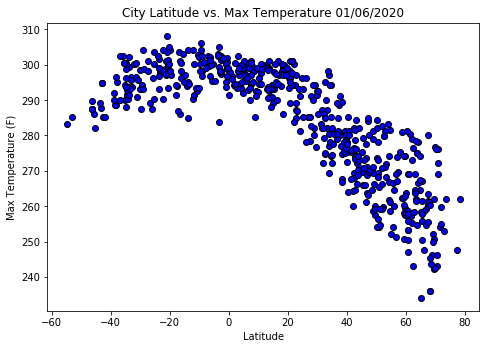

In [7]:
lat = list(df['Lat'])
max_temp = list(df['Max Temp'])
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(lat, max_temp, color='b',edgecolors = 'black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs. Max Temperature '+date1)
plt.savefig('Lat_Temp.png')
plt.show()

#### Latitude vs. Humidity Plot

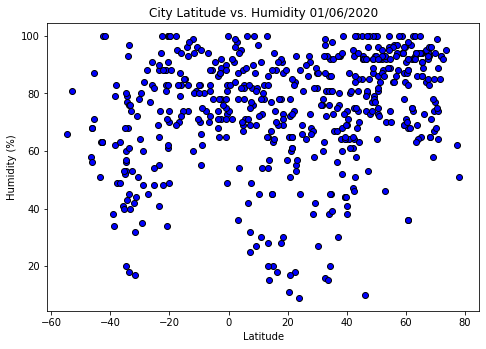

In [8]:
lat = list(df['Lat'])
max_temp = list(df['Humidity'])
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(lat, max_temp, color='b',edgecolors = 'black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Latitude vs. Humidity '+date1)
plt.savefig('Lat_Humid.png')
plt.show()

#### Latitude vs. Cloudiness Plot

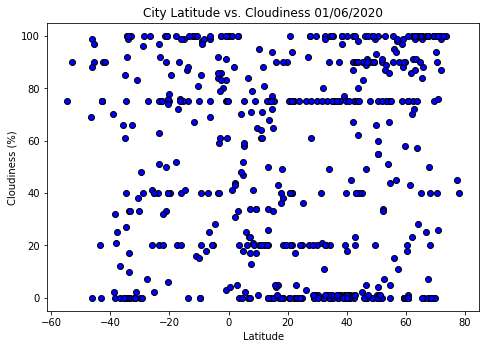

In [9]:
lat = list(df['Lat'])
max_temp = list(df['Cloudiness'])
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(lat, max_temp, color='b',edgecolors = 'black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title('City Latitude vs. Cloudiness '+date1)
plt.savefig('Lat_Cloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

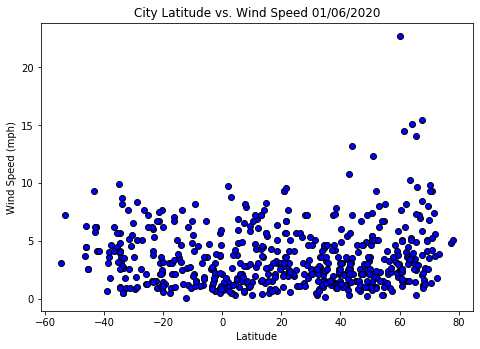

In [10]:
lat = list(df['Lat'])
max_temp = list(df['Wind Speed'])
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(lat, max_temp, color='b', edgecolors = 'black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs. Wind Speed '+date1)
plt.savefig('Lat_Wind.png')
plt.show()